前面一樣是我選擇的題目是太空鐵達尼號這個題目，他題目的描述是:歡迎來到2912年，鐵達尼號太空船是一個月前下水的星際客輪。船上載有近 13,000 名乘客，這艘船開始了它的首航，將太陽系的移民運送到繞附近恆星運行的三顆新的宜居系外行星。

而在繞行半人馬座a星前往其第一個目的地途中，粗心的鐵達尼號太空船與隱藏在塵埃雲中的時空異常相撞。難過的是，它遭遇了與 1000 年前同名的相似命運。雖然飛船完好無損，但幾乎一半的乘客都被傳送到了異次元！
為了幫助救援人員並找回失蹤的乘客，面臨的挑戰是使用從太空船損壞的電腦系統中恢復的記錄來預測哪些乘客被異常現象運送。

我會選擇這個題目是因為這個題目跟上課的內容非常相似，再來是因為可以幫助就救援人員找回失蹤的乘客，我要開始接受這個挑戰!!!

我這個程式是參考這個網址:https://www.kaggle.com/code/xfolia/spaceship-titanic-analysis#%E5%BB%BA%E6%A8%A1

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

根據網址內的程式，一開始先帶入模組，numpy是運算非常重要的模組，pandas是資料處理非常重要的模組，
seaborn跟os詳細我不是很確定，seaborn可以拿來繪圖，os提供了一系列與操作系統交互的功能。

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv("D:/中央大學/大三上/機器學習概論/HW2/train.csv")
test_data = pd.read_csv("D:/中央大學/大三上/機器學習概論/HW2/test.csv")

再帶入warnings模塊用於警告開發者關於程序中可能存在的問題。
再來讀取訓練集資料及測試集資料
下面是顯示train_data的原始內容
可以看到乘客的編號、來自哪個星球、不知道是什麼睡眠、艙等、目的地、年齡及是不是VIP
客房服務、美食廣場、購物中心、水療中心、VR甲板名稱及最重要的是否被轉換

In [ ]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


下面是train_data跟test_data處理前的一些相關資料，可以看到行列數
非空值資料數量、資料型態

In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

下面的train_data.describe().T則是有關於train_data描述性的統計資料
上課的時候有用過，有最小值、第一四分位、中位數、第三四分位及最大值
其中T為行轉列

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


下面是依些統計資料，其中T為行轉列

In [ ]:
train_data.describe(include=[np.object]).T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [ ]:
titanic_train, titanic_test = train_data, test_data 

上面是再轉換變數
接下來是將titanic_train和titanic_test集中到combine
再來對於RoomService、FoodCourt、ShoppingMall、Spa和VRDeck這些列中的NaN值，用 0 來填充
但是老師上課有說，其實去修改原始資料值都會影響回歸結果，所以其實直接刪除資料會對回歸影響最小
通過將RoomService、FoodCourt、ShoppingMall、Spa和VRDeck這些列的值相加，創建一個名為TotalConsumption的新列來表示總消費
再來刪除了原始的消費相關列
後面再針對HomePlanet、CryoSleep、Destination和VIP這些列中的缺失值進行填充
分別用'Earth'、'False'、'TRAPPIST-1e'和'False'來填充
使用Age列的平均值來填充其缺失值
創建一個新列CabinLetter，取Cabin列的首字母
使用CabinLetter的眾數來填充其缺失值
刪除Name和Cabin列
最後將CryoSleep和VIP從True/False轉換為1/0

In [ ]:
#將需要處理的數據集中到同一個列表中
combine = [titanic_train, titanic_test]

#處理每個數據
for dataset in combine:
    #將NAN填充為0
    dataset['RoomService'].fillna(0, inplace=True)
    dataset['FoodCourt'].fillna(0, inplace=True)
    dataset['ShoppingMall'].fillna(0, inplace=True)
    dataset['Spa'].fillna(0, inplace=True)
    dataset['VRDeck'].fillna(0, inplace=True)

    #創立新的字詞
    dataset['TotalConsumption'] = dataset['RoomService'] + dataset['FoodCourt'] + dataset['ShoppingMall'] + dataset['Spa'] + dataset['VRDeck']

    #刪除原本消費的詞
    dataset.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
    
    #填充'HomePlanet'、'CryoSleep'、'Destination'、'VIP'
    dataset['HomePlanet'].fillna('Earth', inplace=True)
    dataset['CryoSleep'].fillna('False', inplace=True)
    dataset['Destination'].fillna('TRAPPIST-1e', inplace=True)
    dataset['VIP'].fillna('False', inplace=True)
    
    # 用平均值填充Age缺失值
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    
    # 創建新列"CabinLetter"，使用Cabin字段的首字母
    dataset['CabinLetter'] = dataset['Cabin'].str[0]
    # 使用最多次數的計數項来填充缺失值
    dataset['CabinLetter'].fillna(dataset['CabinLetter'].mode()[0], inplace=True)
    
    # 删除name、cabin字段
    dataset.drop(['Name', 'Cabin'], axis=1, inplace=True)
    
    dataset['CryoSleep'] = dataset['CryoSleep'].astype(bool).astype(int)
    dataset['VIP'] = dataset['VIP'].astype(bool).astype(int)
    if 'Transported' in dataset.columns:
        dataset['Transported'] = dataset['Transported'].astype(bool).astype(int)

檢查處理後的數據

In [ ]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       8693 non-null   object 
 1   HomePlanet        8693 non-null   object 
 2   CryoSleep         8693 non-null   int32  
 3   Destination       8693 non-null   object 
 4   Age               8693 non-null   float64
 5   VIP               8693 non-null   int32  
 6   Transported       8693 non-null   int32  
 7   TotalConsumption  8693 non-null   float64
 8   CabinLetter       8693 non-null   object 
dtypes: float64(2), int32(3), object(4)
memory usage: 509.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       4277 non-null   object 
 1   HomePlanet        4277 non-null   object 
 2   CryoSleep     

查看處理後的訓練集，接下來進行交叉分析

In [ ]:
titanic_train 

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalConsumption,CabinLetter
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0,0.0,B
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,1,736.0,F
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,0,10383.0,A
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0,5176.0,A
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,1,1091.0,F
...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1,0,8536.0,A
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0,0,0.0,G
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0,1,1873.0,G
8691,9280_01,Europa,0,55 Cancri e,32.0,0,0,4637.0,E


對Transported與CabinLetter進行交叉分析

In [ ]:
titanic_train[['CabinLetter','Transported']].groupby(['CabinLetter'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,CabinLetter,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
0,A,0.496094
5,F,0.444036
3,D,0.433054
4,E,0.357306
7,T,0.200000


前面先導入可視化模組
Transported=0及Transported=1
在各個年齡分布的數量畫出來
X軸以20為間距

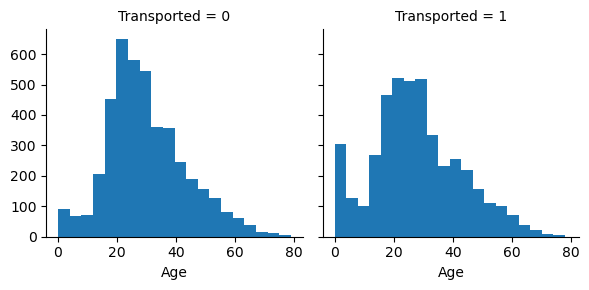

In [ ]:
#對年齡進行可視化
import seaborn as sns
import matplotlib.pyplot as plt
age_map = sns.FacetGrid(titanic_train,col="Transported")
age_map.map(plt.hist,'Age',bins=20)
plt.show()

先下來針對不同的艙等及Transported=0、Transported=1
來畫出相對應的人數對應圖


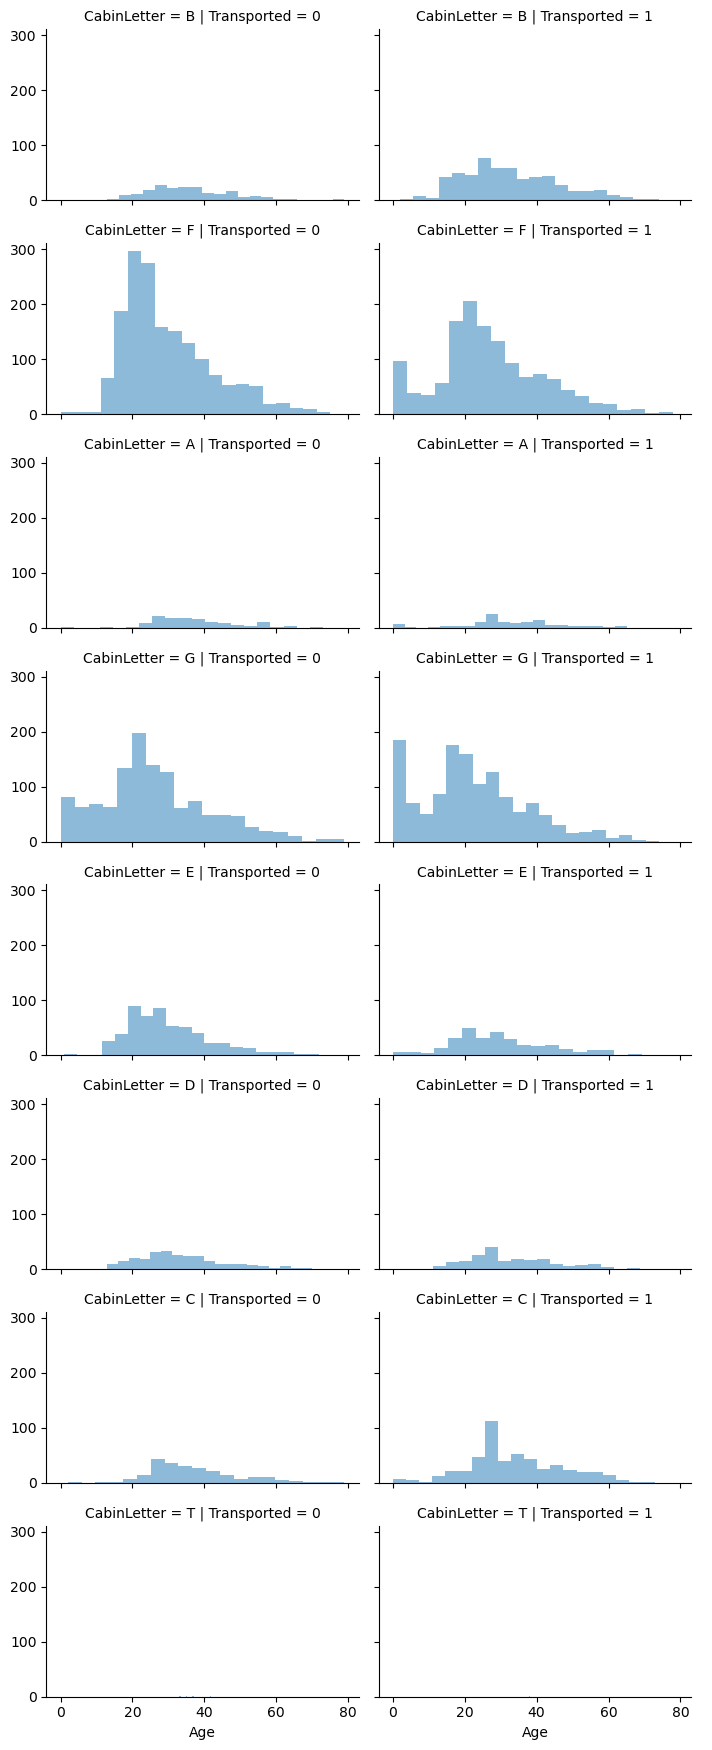

In [ ]:
grid = sns.FacetGrid(titanic_train,col='Transported',row='CabinLetter',height=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

將HomePlanet、Destination内的内容都替換為數值0、1、2
對TotalConsumption和Age分項
使用pd.qcut根據TotalConsumption的四分位數來創建消費區間。然後使用pd.factorize為每個區間分配一個數字代碼
使用pd.cut將Age劃分為5個區間，並同樣使用pd.factorize進行數字編碼
導入LabelEncoder從sklearn.preprocessing
對CabinLetter進行標籤編碼，將不同的字母轉換為數字代碼
最後titanic_train.head()用於顯示處理後的數據集的前幾行

In [ ]:
#處理變量以便建模
for dataset in combine:
    #將HomePlanet、Destination内的内容都替換為數值
    mapping_dict = {
    'HomePlanet': {'Earth': 0, 'Europa': 1, 'Mars': 2},
    'Destination': {'55 Cancri e': 0, 'TRAPPIST-1e': 1, 'PSO J318.5-22': 2}
    }

    dataset.replace(mapping_dict, inplace=True)
    #對TotalConsumption和Age分項
    dataset['FareBin'] = pd.qcut(dataset['TotalConsumption'], 4, duplicates='drop')
    dataset['FareBin_Code'] = pd.factorize(dataset['FareBin'])[0]
    
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    dataset['AgeBin_Code'] = pd.factorize(dataset['AgeBin'])[0]
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()
for dataset in combine:
    dataset['CabinLetter_Code'] = label.fit_transform(dataset['CabinLetter'])
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalConsumption,CabinLetter,FareBin,FareBin_Code,AgeBin,AgeBin_Code,CabinLetter_Code
0,0001_01,1,0,1,39.0,0,0,0.0,B,"(-0.001, 716.0]",0,"(31.6, 47.4]",0,1
1,0002_01,0,0,1,24.0,0,1,736.0,F,"(716.0, 1441.0]",1,"(15.8, 31.6]",1,5
2,0003_01,1,0,1,58.0,1,0,10383.0,A,"(1441.0, 35987.0]",2,"(47.4, 63.2]",2,0
3,0003_02,1,0,1,33.0,0,0,5176.0,A,"(1441.0, 35987.0]",2,"(31.6, 47.4]",0,0
4,0004_01,0,0,1,16.0,0,1,1091.0,F,"(716.0, 1441.0]",1,"(15.8, 31.6]",1,5


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       8693 non-null   object  
 1   HomePlanet        8693 non-null   int64   
 2   CryoSleep         8693 non-null   int32   
 3   Destination       8693 non-null   int64   
 4   Age               8693 non-null   float64 
 5   VIP               8693 non-null   int32   
 6   Transported       8693 non-null   int32   
 7   TotalConsumption  8693 non-null   float64 
 8   CabinLetter       8693 non-null   object  
 9   FareBin           8693 non-null   category
 10  FareBin_Code      8693 non-null   int64   
 11  AgeBin            8693 non-null   category
 12  AgeBin_Code       8693 non-null   int64   
 13  CabinLetter_Code  8693 non-null   int32   
dtypes: category(2), float64(2), int32(4), int64(4), object(2)
memory usage: 696.6+ KB


Target = ['Transported'] 定義了目標變量（預測目標）
titanic_train_x_bin 列出了作為特徵的變量名稱
titanic_train_xy_bin 結合了目標和特徵列表
導入了linear_model、OneHotEncoder、LabelEncoder、feature_selection、model_selection、metrics 等模版
導入了matplotlib和seaborn
使用model_selection.train_test_split 將數據集劃分為訓練集和測試集
將titanic_train數據集中的特徵和目標變量分別劃分為train1_x_bin、test1_x_bin和 train_y_bin、test1_y_bin
test_size=0.3表示測試集占總數據集的30%，random_state=0確保每次劃分都是一致的
這個部分跟上課使用的方式是類似的30%測試70%訓練
印原始數據集 titanic_train 以及劃分後的訓練集和測試集的形狀
train1_x_bin.head()用於展示處理後的訓練數據集的前幾行，以確認特徵的形狀和類型

In [ ]:
Target = ['Transported']
titanic_train_x_bin = ['HomePlanet', 'CryoSleep', 'Destination', 'AgeBin_Code', 'VIP', 'FareBin_Code', 'CabinLetter_Code']
titanic_train_xy_bin = Target + titanic_train_x_bin
print('Bin X Y: ', titanic_train_xy_bin, '\n')

# Model Algorithms
from sklearn import linear_model

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import seaborn as sns

train1_x_bin, test1_x_bin, train_y_bin, test1_y_bin = model_selection.train_test_split(titanic_train[titanic_train_x_bin], titanic_train[Target], test_size=0.3, random_state=0)
print('Data1 Shape: {}'.format(titanic_train.shape))
print('Train1 Shape: {}'.format(train1_x_bin.shape))
print('Test1 Shape: {}'.format(test1_x_bin.shape))
train1_x_bin.head()

Bin X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'AgeBin_Code', 'VIP', 'FareBin_Code', 'CabinLetter_Code'] 

Data1 Shape: (8693, 14)
Train1 Shape: (6085, 7)
Test1 Shape: (2608, 7)


,HomePlanet,CryoSleep,Destination,AgeBin_Code,VIP,FareBin_Code,CabinLetter_Code
7289,0,0,0,4,0,0,5
2709,0,0,2,1,0,1,5
6803,1,0,1,0,0,2,4
3731,0,0,1,0,0,1,5
6333,2,0,1,3,0,0,4


這裡使用的是scikit-learn的linear_model模組
solver='lbfgs' 用於優化算法
logreg.fit(train1_x_bin, train_y_bin.values.ravel()) 這行代碼使用訓練數據集
train1_x_bin和train_y_bin來訓練這個邏輯回歸模型
train_y_bin.values.ravel()將train_y_bin數據轉換為一維數組
這是因為fit方法通常需要目標變量（y）作為一維數組。
Y_pred = logreg.predict(test1_x_bin) 這行代碼使用訓練好的模型對測試數據集 
test1_x_bin進行預測，並將預測結果存儲在Y_pred 中

In [ ]:
logreg = linear_model.LogisticRegression(solver='lbfgs') # 指定模組
logreg.fit(train1_x_bin, train_y_bin.values.ravel()) # 將y轉換為一维數字
Y_pred = logreg.predict(test1_x_bin)

print(logreg.intercept_) 這行代碼用於打印邏輯回歸模型的截距
coef = pd.DataFrame(logreg.coef_).T 將模型的係數（logreg.coef_）轉換成一個Pandas DataFrame，並轉置（.T），使得每個係數在單獨的行中
columns = pd.DataFrame(train1_x_bin.columns, columns=['A']) 創建了一個包含特徵名稱的DataFrame
result = pd.concat([columns, coef], axis=1) 將特徵名稱和對應的係數合併成一個DataFrame
result = result.rename(columns={'A': 'Attribute', 0: 'Coefficients'}) 重命名DataFrame的列
'Attribute' 列包含特徵名稱，'Coefficients' 列包含對應的係數

In [ ]:
print(logreg.intercept_)#截距
coef = pd.DataFrame(logreg.coef_).T #參數
columns = pd.DataFrame(train1_x_bin.columns,columns=['A'])
result = pd.concat([columns,coef],axis=1)
result = result.rename(columns={'A':'Attribute',0:'Coefficients'})
result

[1.10049759]


,Attribute,Coefficients
0,HomePlanet,0.155816
1,CryoSleep,1.508397
2,Destination,-0.242232
3,AgeBin_Code,0.081097
4,VIP,-0.059471
5,FareBin_Code,-0.653509
6,CabinLetter_Code,-0.245962


logreg.score(train1_x_bin, train_y_bin)這行代碼使用score方法計算模型在訓練數據集train1_x_bin和 train_y_bin上的準確率
score方法內部實際上是先對train1_x_bin進行預測，然後將預測結果與真實的train_y_bin做比較，計算準確率
round(logreg.score(...) * 100, 2) 將準確率乘以100轉換為百分比，並四捨五入到小數點後兩位。

In [ ]:
#模型評估
acc_train = round(logreg.score(train1_x_bin,train_y_bin) * 100, 2)
acc_train

73.11

In [ ]:
#View summary of common classification metrics
print('----------------------Metrices---------------------------')
print(metrics.classification_report(y_true=test1_y_bin,y_pred = Y_pred))

----------------------Metrices---------------------------
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1303
           1       0.77      0.63      0.69      1305

    accuracy                           0.72      2608
   macro avg       0.73      0.72      0.72      2608
weighted avg       0.73      0.72      0.72      2608



導入了roc_curve和auc從sklearn.metrics，用於計算ROC曲線和AUC
計算模型的概率預測值
計算ROC曲線的FPR、TPR和閾值
計算曲線下面積AUC
繪製ROC曲線

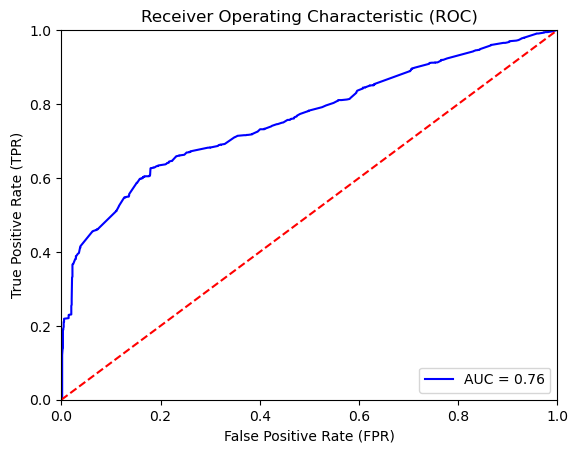

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 計算模型的概率預測值
probs = logreg.predict_proba(test1_x_bin)
preds = probs[:, 1]

#計算ROC曲線的FPR、TPR和閾值
fpr, tpr, threshold = roc_curve(test1_y_bin, preds)

#計算曲線下面積AUC
roc_auc = auc(fpr, tpr)

#繪製ROC曲線
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

使用訓練集訓練模型
使用測試集進行預測
創新的DataFrame，保存預測结果
將结果保存為csv

In [ ]:
# 使用訓練集訓練模型
logreg = linear_model.LogisticRegression(solver='lbfgs')
logreg.fit(train1_x_bin, train_y_bin.values.ravel())

# 使用測試集進行預測
test_x_bin = titanic_test[titanic_train_x_bin]
pred_y_bin = logreg.predict(test_x_bin)

# 創新的DataFrame，保存預測结果
submission = pd.DataFrame({
    "PassengerId": titanic_test["PassengerId"],
    "Transported": pred_y_bin
})

# 將结果保存為csv
submission.replace({0: False, 1: True}, inplace=True)
submission.to_csv('sample_submission.csv', index=False)

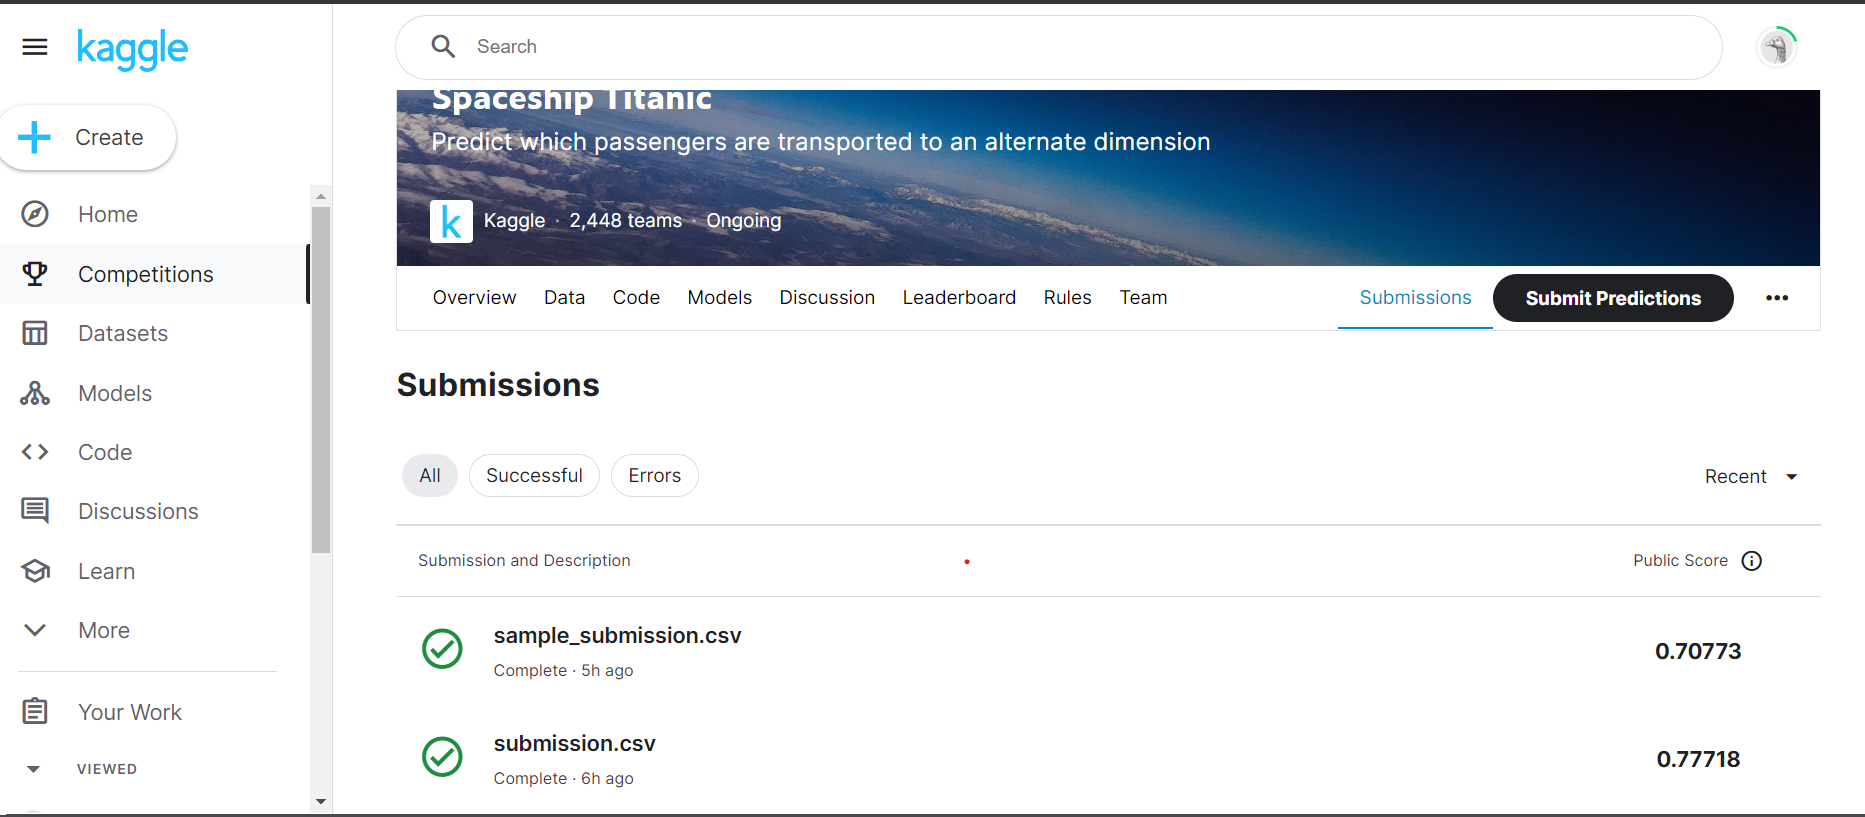

預測果是圖中上方那個0.70773
這個結果跟上一個使用隨機森林比預測成功率低
我對於機器學習還不是到非常熟悉
所以我猜可能是我第二次參考對象使用的模組剛剛好
相對不適合這個太空鐵達尼